In [1]:
import numpy as np
import os
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import tensorflow.keras.datasets
import time

from matplotlib import pyplot as plt
from tensorflow import keras

if not os.path.isdir('HW1_2'):
    os.mkdir('HW1_2')

In [2]:
# Load the Boston Housing dataset
(train_x, train_y), (test_x, test_y) = tensorflow.keras.datasets.boston_housing.load_data()

# Get the shape of the data
print(f'train_x: {train_x.shape}, test_y:{train_y.shape}\ntest_x: {test_x.shape}, test_y: {test_y.shape}')
print('==========\ntrain_x: 404筆13特徵的資料, test_y: 404筆目標值')

57026/57026 [==============================] - 0s 0us/step
train_x: (404, 13), test_y:(404,)
test_x: (102, 13), test_y: (102,)
train_x: 404筆13特徵的資料, test_y: 404筆目標值


In [3]:
scale = sklearn.preprocessing.StandardScaler()
train_x_n = scale.fit_transform(train_x)
test_x_n = scale.transform(test_x)

'''
train_x_mean = train_x.mean(axis=0)
train_x_n = train_x - train_x_mean
test_x_n = test_x - train_x_mean

std = train_x_n.std(axis=0)

train_x_n /= std
test_x_n /= std
'''

'\ntrain_x_mean = train_x.mean(axis=0)\ntrain_x_n = train_x - train_x_mean\ntest_x_n = test_x - train_x_mean\n\nstd = train_x_n.std(axis=0)\n\ntrain_x_n /= std\ntest_x_n /= std\n'

In [2]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)


NameError: name 'keras' is not defined

In [3]:
model.summary()

NameError: name 'model' is not defined

In [11]:
train_history = model.fit(train_x_n, train_y, epochs=80, batch_size=16)

Epoch 1/80
26/26 [==============================] - 1s 934us/step - loss: 501.5086 - mae: 20.4012
Epoch 2/80
26/26 [==============================] - 0s 740us/step - loss: 315.4953 - mae: 15.6530
Epoch 3/80
26/26 [==============================] - 0s 740us/step - loss: 147.5135 - mae: 9.9765
Epoch 4/80
26/26 [==============================] - 0s 779us/step - loss: 64.8505 - mae: 6.1243
Epoch 5/80
26/26 [==============================] - 0s 779us/step - loss: 38.5375 - mae: 4.5393
Epoch 6/80
26/26 [==============================] - 0s 740us/step - loss: 27.3601 - mae: 3.7764
Epoch 7/80
26/26 [==============================] - 0s 779us/step - loss: 22.6357 - mae: 3.3252
Epoch 8/80
26/26 [==============================] - 0s 818us/step - loss: 20.5013 - mae: 3.1796
Epoch 9/80
26/26 [==============================] - 0s 819us/step - loss: 18.2171 - mae: 2.9893
Epoch 10/80
26/26 [==============================] - 0s 818us/step - loss: 16.6576 - mae: 2.8116
Epoch 11/80
26/26 [===============

In [12]:
predictions = model.predict(test_x_n[:10])

print(f'predictions[0]: {predictions[0][0]}')
print(f'test_y[0]: {test_y[0]}')

1/1 [==============================] - 0s 98ms/step
predictions[0]: 6.508274078369141
test_y[0]: 7.2


13/13 [==============================] - 0s 649us/step
Test data set:
MAE: 2.7628961320016896, MAPE: 0.13482674495273045, RMSE: 4.220300752589321
Train data set:
MAE: 1.715964895899933, MAPE: 0.08522779344715888, RMSE: 2.480451515749599


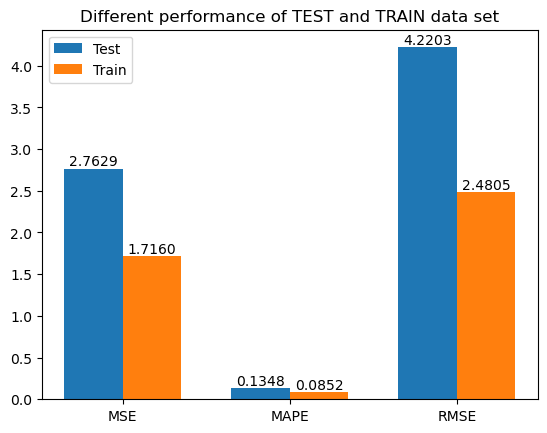

In [13]:
# Get MAE, MAPE and RMSE by sklearn.metrics
test_predictions = model.predict(test_x_n)
test_mae = sklearn.metrics.mean_absolute_error(test_y, test_predictions)
test_mape = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions)
test_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions))

test_predictions = model.predict(train_x_n)
train_mae = sklearn.metrics.mean_absolute_error(train_y, test_predictions)
train_mape = sklearn.metrics.mean_absolute_percentage_error(train_y, test_predictions)
train_rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_y, test_predictions))

print('Test data set:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Train data set:')
print(f'MAE: {train_mae}, MAPE: {train_mape}, RMSE: {train_rmse}')

# Bar chart
x = range(3)
bar_width = 0.35
test_bars= plt.bar(x, [test_mae, test_mape, test_rmse], bar_width, label='Test')
train_bars = plt.bar([i + bar_width for i in x], [train_mae, train_mape, train_rmse], bar_width, label='Train')
plt.xticks([i + bar_width / 2 for i in x], ['MSE', 'MAPE', 'RMSE'])
plt.bar_label(train_bars, fmt='%.4f')
plt.bar_label(test_bars, fmt='%.4f')
plt.title('Different performance of TEST and TRAIN data set')
plt.legend()
plt.show()

In [14]:
df = pd.DataFrame.from_dict({'Test': [test_mae, test_mape, test_rmse], 'Train': [train_mae, train_mape, train_rmse]})
df.index = ['MAE', 'MAPE', 'RMSE']
df.to_csv(os.path.join('HW1_2', 'Test_Train_performance.csv'))
df

,Test,Train
MAE,2.762896,1.715965
MAPE,0.134827,0.085228
RMSE,4.220301,2.480452


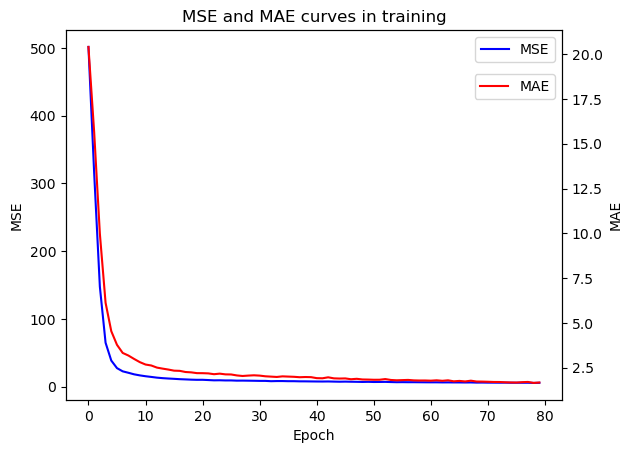

In [15]:
fig, ax_a = plt.subplots()
ax_l = ax_a.twinx()

ax_a.plot(train_history.history['loss'], 'b-', label='MSE')
ax_a.set_xlabel('Epoch')
ax_a.set_ylabel('MSE')

ax_l.plot(train_history.history['mae'], 'r-', label='MAE')
ax_l.set_ylabel('MAE')

ax_a.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
ax_l.legend(loc='best', bbox_to_anchor=(1.0, 0.9))

plt.title('MSE and MAE curves in training')

plt.show()

In [16]:
df = pd.DataFrame.from_dict({'MSE': train_history.history['loss'], 'MAE': train_history.history['mae']})
df.to_csv(os.path.join('HW1_2', 'MSE_MAE_curves.csv'))
df

,MSE,MAE
0,501.508575,20.401194
1,315.495331,15.652976
2,147.513504,9.976536
3,64.850471,6.124333
4,38.537544,4.539271
...,...,...
75,5.806396,1.671839
76,5.778419,1.693337
77,5.771281,1.706272
78,5.527037,1.651474


In [17]:
model_a = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_a.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

train_history_a = model_a.fit(train_x, train_y, epochs=80, batch_size=16)

Epoch 1/80
26/26 [==============================] - 0s 1ms/step - loss: 1153.1422 - mae: 20.1484
Epoch 2/80
26/26 [==============================] - 0s 973us/step - loss: 77.4078 - mae: 6.4015
Epoch 3/80
26/26 [==============================] - 0s 973us/step - loss: 94.0423 - mae: 7.2815
Epoch 4/80
26/26 [==============================] - 0s 955us/step - loss: 87.8369 - mae: 6.9032
Epoch 5/80
26/26 [==============================] - 0s 934us/step - loss: 75.8246 - mae: 6.4437
Epoch 6/80
26/26 [==============================] - 0s 955us/step - loss: 85.8150 - mae: 7.4008
Epoch 7/80
26/26 [==============================] - 0s 975us/step - loss: 79.7726 - mae: 6.8951
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 68.5142 - mae: 6.3714
Epoch 9/80
26/26 [==============================] - 0s 973us/step - loss: 73.8764 - mae: 6.4948
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 68.1285 - mae: 6.0979
Epoch 11/80
26/26 [=======================

In [18]:
print('Test data set:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')

test_predictions_a = model.predict(test_x)
train_mae_a = sklearn.metrics.mean_absolute_error(test_y, test_predictions_a)
train_mape_a = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_a)
train_rmse_a = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_a))

print('With Normalization:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Without Normalizatio:')
print(f'MAE: {train_mae_a}, MAPE: {train_mape_a}, RMSE: {train_rmse_a}')

Test data set:
MAE: 2.7628961320016896, MAPE: 0.13482674495273045, RMSE: 4.220300752589321
4/4 [==============================] - 0s 2ms/step
With Normalization:
MAE: 2.7628961320016896, MAPE: 0.13482674495273045, RMSE: 4.220300752589321
Without Normalizatio:
MAE: 1894.2466047698376, MAPE: 103.22797083784593, RMSE: 1930.355269852419


In [19]:
df = pd.DataFrame.from_dict(
    {'with normalizaion': train_history.history['loss'],
     'without normalizaion': train_history_a.history['loss']}
    )
df.to_csv(os.path.join('HW1_2', 'MSE_with_without_normalization.csv'))
df

,with normalizaion,without normalizaion
0,501.508575,1153.142212
1,315.495331,77.407784
2,147.513504,94.042320
3,64.850471,87.836937
4,38.537544,75.824631
...,...,...
75,5.806396,32.441303
76,5.778419,33.601368
77,5.771281,35.314587
78,5.527037,31.876974


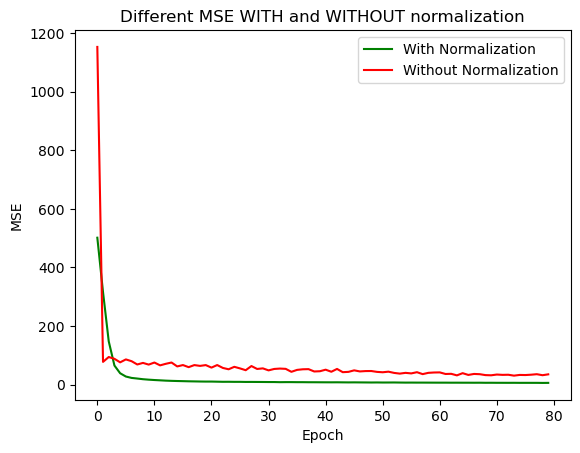

In [20]:
# Write accuracy and loss curves

plt.plot(train_history.history['loss'], 'g-', label='With Normalization',)
plt.plot(train_history_a.history['loss'], 'r-', label='Without Normalization')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='best')

plt.title('Different MSE WITH and WITHOUT normalization')

plt.show()

In [21]:
result_unit_num = []
result_mae = []

for i in range(16):
    unit_num = 16*(i+1)
    model_b = keras.Sequential([
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_b.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {unit_num} units...', end='\r')
    train_history_b = model_b.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_b = model_b.predict(test_x_n)
    test_mae_b = sklearn.metrics.mean_absolute_error(test_y, test_predictions_b)
    result_unit_num.append(unit_num)
    result_mae.append(test_mae_b)
    print(f'Model with {unit_num} units\'s MAE: {test_mae_b}')

4/4 [==============================] - 0s 1ms/step
Model with 16 units's MAE: 3.0325352117127067
4/4 [==============================] - 0s 1ms/step
Model with 32 units's MAE: 2.794380183313407
4/4 [==============================] - 0s 2ms/step
Model with 48 units's MAE: 2.720286989212036
4/4 [==============================] - 0s 1ms/step
Model with 64 units's MAE: 2.5727341866960716
4/4 [==============================] - 0s 2ms/step
Model with 80 units's MAE: 2.5304814207787607
4/4 [==============================] - 0s 1ms/step
Model with 96 units's MAE: 2.619102819293153
4/4 [==============================] - 0s 1ms/step
Model with 112 units's MAE: 2.7393833646587296
4/4 [==============================] - 0s 2ms/step
Model with 128 units's MAE: 2.5238173129511816
4/4 [==============================] - 0s 2ms/step
Model with 144 units's MAE: 2.547833679236618
4/4 [==============================] - 0s 1ms/step
Model with 160 units's MAE: 2.5825581971336815
4/4 [=========================

In [22]:
df = pd.DataFrame(result_mae, index=result_unit_num, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_units.csv'))
df

,MAE
16,3.032535
32,2.794380
48,2.720287
64,2.572734
80,2.530481
96,2.619103
112,2.739383
128,2.523817
144,2.547834
160,2.582558


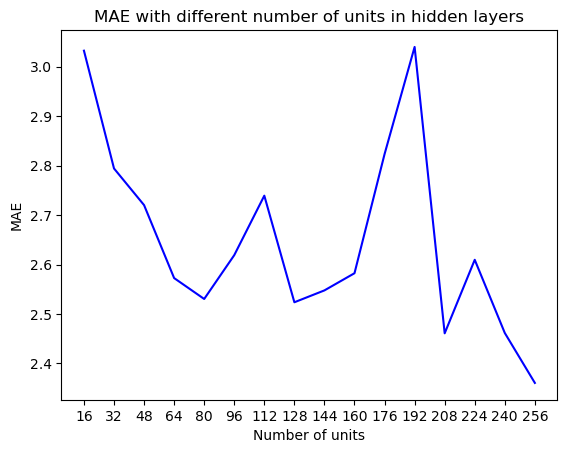

In [23]:
plt.plot(result_unit_num, result_mae, 'b-')
plt.xlabel('Number of units')
plt.ylabel('MAE')
plt.xticks(result_unit_num)
plt.title('MAE with different number of units in hidden layers')
plt.show()

In [24]:
activation_functions = ['linear', 'relu', 'leakyreLU', 'sigmoid', 'tanh', 'gelu', 'softplus', 'mish', 'swish']
result_mae = []

for activation_function in activation_functions:
    if activation_function == 'leakyreLU':
        act = keras.layers.LeakyReLU(alpha=0.03)
    else:
        act = activation_function
    model_c = keras.Sequential([
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(1)
    ])
    model_c.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {activation_function} activation function...', end='\r')
    train_history_c = model_c.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_c = model_c.predict(test_x_n)
    test_mae_c = sklearn.metrics.mean_absolute_error(test_y, test_predictions_c)
    result_mae.append(test_mae_c)
    print(f'Model with {activation_function} activation function\'s MAE: {test_mae_c}')

4/4 [==============================] - 0s 1ms/step
Model with linear activation function's MAE: 3.390412593355366
4/4 [==============================] - 0s 1ms/step
Model with relu activation function's MAE: 2.602319657568838
4/4 [==============================] - 0s 1ms/step
Model with leakyreLU activation function's MAE: 2.7489823266571642
4/4 [==============================] - 0s 2ms/step
Model with sigmoid activation function's MAE: 3.234740752799839
4/4 [==============================] - 0s 1ms/step
Model with tanh activation function's MAE: 2.354216865464753
4/4 [==============================] - 0s 1ms/step
Model with gelu activation function's MAE: 2.6308954379137828
4/4 [==============================] - 0s 973us/step
Model with softplus activation function's MAE: 2.822327290329279


ValueError: Unknown activation function: mish. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [25]:
df = pd.DataFrame(result_mae, index=activation_functions, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_activation_functions.csv'))
df

ValueError: Shape of passed values is (7, 1), indices imply (9, 1)

In [ ]:
plt.plot(activation_functions, result_mae, 'b-')
plt.xlabel('Activation function')
plt.ylabel('MAE')
plt.xticks(activation_functions)
plt.title('MAE with different activation functions')
plt.show()

In [ ]:
optimizers = ['sgd', 'sgd wm', 'adagrad', 'rmsprop', 'rmsprop wm','adam']
result_mae = []

for optimizer in optimizers:
    model_d = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    if optimizer == 'sgd wm':
        opt = keras.optimizers.SGD(momentum=0.5)
    elif optimizer == 'rmsprop wm':
        opt = keras.optimizers.RMSprop(momentum=0.5)
    else:
        opt = optimizer
    model_d.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {optimizer} optimizer...', end='\r')
    train_history_d = model_d.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_d = model_d.predict(test_x_n)
    test_mae_d = sklearn.metrics.mean_absolute_error(test_y, test_predictions_d)
    result_mae.append(test_mae_d)
    print(f'Model with {optimizer} optimizer\'s MAE: {test_mae_d}')

In [ ]:
df = pd.DataFrame.from_dict({'Optimizer': optimizers, 'MAE': result_mae})
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_optimizers.csv'))
df

In [ ]:
plt.plot(optimizers, result_mae, 'b-')
plt.xlabel('Optimizer')
plt.ylabel('MAE')
plt.xticks(optimizers)
plt.title('MAE with different optimizer')
plt.text(-0.8, 1.82, 'wm: with momentum')
plt.show()

In [ ]:
result_epochs_num = []
result_test_mae = []
result_train_mae = []
result_times = []

for i in range(10):
    model_e = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_e.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    epochs = 100 * (i+1)
    print(f'Training model with {epochs} epochs...', end='\r')
    st = time.perf_counter()
    train_history_e = model_e.fit(train_x_n, train_y, epochs=epochs, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_e = model_e.predict(test_x_n)
    train_predictions_e = model_e.predict(train_x_n)
    result_test_mae_e = sklearn.metrics.mean_absolute_error(test_y, test_predictions_e)
    result_train_mae_e = sklearn.metrics.mean_absolute_error(train_y, train_predictions_e)
    result_epochs_num.append(epochs)
    result_test_mae.append(result_test_mae_e)
    result_train_mae.append(result_train_mae_e)
    result_times.append(et - st)
    print(f'Model with {epochs} epochs\'s MAE: {result_test_mae_e} in {et - st} seconds')

In [ ]:
df = pd.DataFrame.from_dict({'Test': result_test_mae, 'Train': result_train_mae, 'Time':result_times})
df.index = result_epochs_num
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_epochs.csv'))
df

In [ ]:
fig, ax_mae = plt.subplots()
ax_time = ax_mae.twinx()

ax_mae.plot(result_epochs_num, result_test_mae, 'b-', label='Test MAE')
ax_mae.plot(result_epochs_num, result_train_mae, 'g-', label='Train MAE')
ax_mae.set_xlabel('Number of epochs')
ax_mae.set_ylabel('MAE')
ax_mae.set_title('MAE with different number of epochs')
ax_mae.legend(loc='lower left')

ax_time.plot(result_epochs_num, result_times, 'r-', label='Time')
ax_time.set_ylabel('Time')
ax_time.legend(loc='upper right')
plt.show()

In [ ]:
result_batch_num = []
result_train_history = []

for i in range(5):
    model_f = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_f.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )

    batch_size = 8 * (i+1)
    print(f'Training model with {batch_size} batch size...', end='\r')
    train_history_f = model_f.fit(train_x_n, train_y, epochs=80, batch_size=batch_size, verbose=0)
    result_batch_num.append(batch_size)
    result_train_history.append(train_history_f.history['loss'])
    print(f'Model with {batch_size} batch size\'s MAE: {train_history_f.history['mae'][-1]}')

In [ ]:
df = pd.DataFrame.from_dict({'16': result_train_history[0], '32': result_train_history[1], '48': result_train_history[2], '64': result_train_history[3], '80': result_train_history[4]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_batch_size.csv'))
df

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_colors = np.random.choice(colors, size=5, replace=False)

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_1.plot(line, color=color, label=batch_size)
ax_1.legend(title='Batch size')
ax_1.set_ylabel('MSE')

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_2.plot(line, color=color, label=batch_size)
ax_2.set_ylim(5, 25)
ax_2.set_xlim(50, 80)
ax_2.legend(title='Batch size')
ax_2.set_ylabel('MSE')

plt.show()

In [ ]:
result_train_history = []
result_times = []
result_params_num = []

for i in range(10):
    model_g = keras.Sequential()
    for j in range(i):
        model_g.add(keras.layers.Dense(32, activation='relu'))
    model_g.add(keras.layers.Dense(1))
    model_g.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {i+1} hidden layer...', end='\r')
    st = time.perf_counter()
    train_history_g = model_g.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_g = model_g.predict(test_x_n)
    result_train_history.append(train_history_g.history['loss'])
    result_times.append(et - st)
    result_params_num.append(model_g.count_params())
    print(f'Model with {i+1} hidden layer\'s MSE: {train_history_g.history['loss'][-1]}')

In [ ]:
df = pd.DataFrame.from_dict({
    '1': result_train_history[0],
    '2': result_train_history[1],
    '3': result_train_history[2],
    '4': result_train_history[3],
    '5': result_train_history[4],
    '6': result_train_history[5],
    '7': result_train_history[6],
    '8': result_train_history[7],
    '9': result_train_history[8],
    '10': result_train_history[9]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_hidden_layers.csv'))
df

In [ ]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(10, 10))

random_colors = np.random.choice(colors, size=10, replace=False)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_1.plot(line, color=color, label=layers)
ax_1.legend(title='Number of hidden layers')
ax_1.set_ylabel('MSE')
ax_1.set_xlabel('Epoch')
ax_1.set_title('MSE with different number of hidden layers')

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_2.plot(line, color=color, label=layers)
ax_2.legend(title='Number of hidden layers')
ax_2.set_ylabel('MSE')
ax_2.set_xlabel('Epoch')
ax_2.set_xlim(0, 15)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_3.plot(line, color=color, label=layers)
ax_3.legend(title='Number of hidden layers', loc='upper left')
ax_3.set_ylabel('MSE')
ax_3.set_xlabel('Epoch')
ax_3.set_ylim(0, 15)
ax_3.set_xlim(70, 80)

ax_4.plot(range(1,11), result_times, 'b-')
ax_5 = ax_4.twinx()
ax_5.plot(range(1,11), result_params_num, 'r-')
ax_4.set_ylabel('Time')
ax_5.set_ylabel('Number of parameters')
ax_4.set_xlabel('Number of hidden layers')
ax_4.legend(['Time'], loc='lower right')
ax_5.legend(['Number of parameters'], loc='upper left')
ax_4.set_title('Time & num of parameters with different num of layers')